<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Load-data-with-dtype_dicts" data-toc-modified-id="Load-data-with-dtype_dicts-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load data with dtype_dicts</a></span></li></ul></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#listing-df" data-toc-modified-id="listing-df-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>listing df</a></span><ul class="toc-item"><li><span><a href="#Basic-cleaning,-dropping-columns..." data-toc-modified-id="Basic-cleaning,-dropping-columns...-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Basic cleaning, dropping columns...</a></span></li><li><span><a href="#Text-Data" data-toc-modified-id="Text-Data-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Text Data</a></span></li><li><span><a href="#Numerical-Data" data-toc-modified-id="Numerical-Data-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Numerical Data</a></span></li></ul></li><li><span><a href="#calendar-df" data-toc-modified-id="calendar-df-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>calendar df</a></span></li><li><span><a href="#neighbourhood-df" data-toc-modified-id="neighbourhood-df-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>neighbourhood df</a></span></li><li><span><a href="#reviews-df" data-toc-modified-id="reviews-df-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>reviews df</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Toronto-property-prices-test" data-toc-modified-id="Toronto-property-prices-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Toronto property prices test</a></span><ul class="toc-item"><li><span><a href="#geopandas-test" data-toc-modified-id="geopandas-test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>geopandas test</a></span></li><li><span><a href="#Folium-test" data-toc-modified-id="Folium-test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Folium test</a></span></li></ul></li></ul></div>

# Airbnb

Possible questions: 

1. Do reviews affect price? Provide or remove pricing power?
2. Do Airbnb rates by neighbourhood match housing prices/rents by neighbourhood?


https://www.torontofurnishedrentals.com/toronto-house-prices-neighborhood-map/


## Dependencies

In [88]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text
from bs4 import BeautifulSoup
from nltk import word_tokenize

In [104]:
# Map
import geopandas as gpd  # need to install
from shapely.geometry import Point

## Load Data

###### Initial read_csv generates a dtype memory warning due to pandas having to read in the entire file before being able to guess at the dtypes. The following cells extract the initial guessed dtype results on first load, saves to respective dicts, and uses the dicts for future read_csv calls.
[ony be needed for listing df]

In [6]:
# LISTING: need to wrap this in .Series to specify output of .dtypes to str for the values of the dict
#pd.Series(listing.dtypes, dtype=str).to_dict()

In [7]:
listing_dtypes = {
    'id': 'int64',
    'listing_url': 'object',
    'scrape_id': 'int64',
    'last_scraped': 'object',
    'name': 'object',
    'summary': 'object',
    'space': 'object',
    'description': 'object',
    'experiences_offered': 'object',
    'neighborhood_overview': 'object',
    'notes': 'object',
    'transit': 'object',
    'access': 'object',
    'interaction': 'object',
    'house_rules': 'object',
    'thumbnail_url': 'float64',
    'medium_url': 'float64',
    'picture_url': 'object',
    'xl_picture_url': 'float64',
    'host_id': 'int64',
    'host_url': 'object',
    'host_name': 'object',
    'host_since': 'object',
    'host_location': 'object',
    'host_about': 'object',
    'host_response_time': 'object',
    'host_response_rate': 'object',
    'host_acceptance_rate': 'float64',
    'host_is_superhost': 'object',
    'host_thumbnail_url': 'object',
    'host_picture_url': 'object',
    'host_neighbourhood': 'object',
    'host_listings_count': 'float64',
    'host_total_listings_count': 'float64',
    'host_verifications': 'object',
    'host_has_profile_pic': 'object',
    'host_identity_verified': 'object',
    'street': 'object',
    'neighbourhood': 'object',
    'neighbourhood_cleansed': 'object',
    'neighbourhood_group_cleansed': 'float64',
    'city': 'object',
    'state': 'object',
    'zipcode': 'object',
    'market': 'object',
    'smart_location': 'object',
    'country_code': 'object',
    'country': 'object',
    'latitude': 'float64',
    'longitude': 'float64',
    'is_location_exact': 'object',
    'property_type': 'object',
    'room_type': 'object',
    'accommodates': 'int64',
    'bathrooms': 'float64',
    'bedrooms': 'float64',
    'beds': 'float64',
    'bed_type': 'object',
    'amenities': 'object',
    'square_feet': 'float64',
    'price': 'object',
    'weekly_price': 'object',
    'monthly_price': 'object',
    'security_deposit': 'object',
    'cleaning_fee': 'object',
    'guests_included': 'int64',
    'extra_people': 'object',
    'minimum_nights': 'int64',
    'maximum_nights': 'int64',
    'minimum_minimum_nights': 'int64',
    'maximum_minimum_nights': 'int64',
    'minimum_maximum_nights': 'int64',
    'maximum_maximum_nights': 'int64',
    'minimum_nights_avg_ntm': 'float64',
    'maximum_nights_avg_ntm': 'float64',
    'calendar_updated': 'object',
    'has_availability': 'object',
    'availability_30': 'int64',
    'availability_60': 'int64',
    'availability_90': 'int64',
    'availability_365': 'int64',
    'calendar_last_scraped': 'object',
    'number_of_reviews': 'int64',
    'number_of_reviews_ltm': 'int64',
    'first_review': 'object',
    'last_review': 'object',
    'review_scores_rating': 'float64',
    'review_scores_accuracy': 'float64',
    'review_scores_cleanliness': 'float64',
    'review_scores_checkin': 'float64',
    'review_scores_communication': 'float64',
    'review_scores_location': 'float64',
    'review_scores_value': 'float64',
    'requires_license': 'object',
    'license': 'float64',
    'jurisdiction_names': 'object',
    'instant_bookable': 'object',
    'is_business_travel_ready': 'object',
    'cancellation_policy': 'object',
    'require_guest_profile_picture': 'object',
    'require_guest_phone_verification': 'object',
    'calculated_host_listings_count': 'int64',
    'calculated_host_listings_count_entire_homes': 'int64',
    'calculated_host_listings_count_private_rooms': 'int64',
    'calculated_host_listings_count_shared_rooms': 'int64',
    'reviews_per_month': 'float64'
}

### Load data with dtype_dicts

In [8]:
!pwd

/Users/martinfoot/Documents/DATA SCIENCE/Udacity/DS nd/Projects/Project 1


In [9]:
listing = pd.read_csv('data/listings.csv.gz', compression='gzip', dtype=listing_dtypes)

In [10]:
cal = pd.read_csv('data/calendar.csv.gz', compression='gzip') #, dtype='cal_dtypes')

In [11]:
reviews = pd.read_csv('data/reviews.csv.gz', compression='gzip') #, dtype='cal_dtypes')

In [12]:
neighbour = pd.read_csv('data/neighbourhoods.csv')

## Cleaning

### listing df

#### Basic cleaning, dropping columns...

In [13]:
listing.shape

(23397, 106)

In [14]:
pd.set_option('display.max_columns', len(listing.columns)) # To view all columns
pd.set_option('display.max_rows', 50) # To view min 50 rows

In [15]:
listing.head(3)

id                         listing_url       scrape_id last_scraped  \
0   1419   https://www.airbnb.com/rooms/1419  20191207213017   2019-12-08   
1   8077   https://www.airbnb.com/rooms/8077  20191207213017   2019-12-08   
2  12604  https://www.airbnb.com/rooms/12604  20191207213017   2019-12-08   

                                 name  \
0     Beautiful home in amazing area!   
1  Downtown Harbourfront Private Room   
2      Seaton Village Parlour Bedroom   

                                             summary  \
0  This large, family home is located in one of T...   
1  Guest room in a luxury condo with access to al...   
2   Comfortable sofa bed in airy main floor parlour.   

                                               space  \
0  Visit Toronto with this fabulous furnished hom...   
1  My husband and I are both artists. I give pain...   
2  Family of 4 (2 kids)  plus a friendly dog open...   

                                         description experiences_offered  \
0  This large, family home is located in one of T...                none   
1  Guest room in a luxury condo with access to al...                none   
2  Comfortable sofa bed in airy main floor parlou...                none   

                               neighborhood_overview  \
0  The apartment is located in the Ossington stri...   
1                                                NaN   
2                                                NaN   

                                               notes  \
0  To learn a little more about our home, see: (U...   
1                                                NaN   
2                                                NaN   

                                             transit  \
0  All forms of public transportation are easily ...   
1                                                NaN   
2                                                NaN   

                                      access  \
0  The whole house and garden are available.   
1                                        NaN   
2                                        NaN   

                                         interaction  \
0  We will be out of town, but fully accessible b...   
1                                                NaN   
2                                                NaN   

                                         house_rules  thumbnail_url  \
0  This is our much-loved family home. We expect ...            NaN   
1                                 No smoking please.            NaN   
2                                         no smoking            NaN   

   medium_url                                        picture_url  \
0         NaN  https://a0.muscache.com/im/pictures/76206750/d...   
1         NaN  https://a0.muscache.com/im/pictures/11780344/1...   
2         NaN  https://a0.muscache.com/im/pictures/5282025/91...   

   xl_picture_url  host_id                                 host_url  \
0             NaN     1565   https://www.airbnb.com/users/show/1565   
1             NaN    22795  https://www.airbnb.com/users/show/22795   
2             NaN    48239  https://www.airbnb.com/users/show/48239   

        host_name  host_since             host_location  \
0       Alexandra  2008-08-08  Toronto, Ontario, Canada   
1  Kathie & Larry  2009-06-22  Toronto, Ontario, Canada   
2            Rona  2009-10-25  Toronto, Ontario, Canada   

                                          host_about host_response_time  \
0  I live in Toronto, Canada with my husband and ...                NaN   
1  My husband and I have been airbnb host for alm...                NaN   
2  I love travelling and exploring new places, ma...                NaN   

  host_response_rate  host_acceptance_rate host_is_superhost  \
0                NaN                   NaN                 f   
1                NaN                   NaN                 f   
2                NaN                   NaN                 f   

                                  host_thumbna

In [16]:
# List of columns with zero NaN's
no_nan_cols = listing.columns[listing.isnull().sum() == 0]
print(len(no_nan_cols))
no_nan_cols  # 52 cols, but still some can be dropped...

52


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'experiences_offered',
       'picture_url', 'host_id', 'host_url', 'host_verifications', 'street',
       'neighbourhood_cleansed', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'requires_license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_ve

In [17]:
mostly_nan_cols = listing.columns[listing.isnull().sum() / len(listing) > 0.9]
print(len(mostly_nan_cols))
mostly_nan_cols  # 10 cols to drop (>90% nan)

10


Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'license', 'jurisdiction_names'],
      dtype='object')

In [18]:
# these next few cells I kept changing to use for exploring cols to add to 'drop_cols' list...
listing.guests_included.isnull().sum()

0

In [19]:
set(listing.requires_license)

{'f'}

In [20]:
(listing.review_scores_accuracy != listing.review_scores_cleanliness).sum()

10591

In [21]:
# only a few are different?
(listing['host_listings_count'] != listing['host_total_listings_count']).sum()

285

In [22]:
listing[listing['host_listings_count'] != listing['host_total_listings_count']][['host_listings_count', 'host_total_listings_count']]

host_listings_count  host_total_listings_count
115                    NaN                        NaN
166                    NaN                        NaN
167                    NaN                        NaN
317                    NaN                        NaN
469                    NaN                        NaN
...                    ...                        ...
23164                  NaN                        NaN
23239                  NaN                        NaN
23241                  NaN                        NaN
23259                  NaN                        NaN
23291                  NaN                        NaN

[285 rows x 2 columns]

In [23]:
print((listing['host_listings_count'] != listing['calculated_host_listings_count']).sum())  # what's the meaning of diff's?
pd.set_option('display.max_rows', 50)  # why doesn't this work??
listing[(listing['host_listings_count'] != listing['calculated_host_listings_count'])][['name', 'host_listings_count', 'calculated_host_listings_count']]

8147


name  host_listings_count  \
10                          Yonge & Bloor Studio Skyline                 13.0   
11                   Fountain View Studio - Eaton center                 13.0   
12                        Yonge & Bloor 2 Bedroom Master                 13.0   
13                    Yonge & Bloor Lakeview Master BR                   13.0   
14                           Yorkville one bedroom Condo                 13.0   
...                                                  ...                  ...   
23390      T386@Modern high-end CN Tower view 2BR&2 bath                  0.0   
23391  Trendy 1 BR Apartment in the Annex - Bloor/Spa...                  7.0   
23394     4 LOFTS- 6000 SQ FT-2-15 Bedrooms + Party Room                 23.0   
23395   4 Bed/8 ppl Lux Suite⭐CN Tower View⭐FREE Parking                  0.0   
23396   Spacious Room 3-Min Walk to Subway (Female Only)                  3.0   

       calculated_host_listings_count  
10                                 12  
11                                 12  
12                                 12  
13                                 12  
14                                 12  
...                               ...  
23390                               1  
23391                               9  
23394                              22  
23395                               1  
23396                               4  

[8147 rows x 3 columns]

In [24]:
listing[ abs(listing['host_listings_count'] - listing['calculated_host_listings_count']) > 2][['name', 'host_listings_count', 'calculated_host_listings_count']]

name  host_listings_count  \
44                   2 bd Apt at Yonge & Bloor Yorkville                  5.0   
96           SUNNY DBL CORKTOWN BREAKFAST, 2 BIKES INCL.                  6.0   
100                    1BR-Close to Yonge & Eglinton 202                 15.0   
189                     Convenient 1B + Guest Room Condo                 73.0   
192                   Stunning 17FT Ceiling Modern Condo                 73.0   
...                                                  ...                  ...   
23362  superior bedroom for rent close subway 宽敞明亮的房间近地铁                  9.0   
23366          Simply Comfort. Peacock Studio 35th floor                160.0   
23370   1BR Suite in King West - Fashion & Ent. District                  3.0   
23374       Newly renovated room Victoria Park and Finch                 51.0   
23375      1 Bedroom unit Furnished in Fashion Distrinct                 73.0   

       calculated_host_listings_count  
44                                  1  
96                                  1  
100                                 2  
189                                82  
192                                82  
...                               ...  
23362                               6  
23366                             121  
23370                               6  
23374                               4  
23375                              82  

[2290 rows x 3 columns]

In [25]:
# smart_location is mostly the same (Toronto, Canada) and sometimes duplicates 'neighbourhood_cleansed'
listing[listing.smart_location == 'Cabbagetown, Toronto, Canada'][['smart_location', 'neighbourhood_cleansed']]

smart_location           neighbourhood_cleansed
20021  Cabbagetown, Toronto, Canada  Cabbagetown-South St.James Town

In [26]:
(listing.is_business_travel_ready == 'f').sum()

23397

In [27]:
drop_cols = ['scrape_id', 'last_scraped', 'thumbnail_url', 'xl_picture_url', 'host_url', 'host_location', \
             'host_total_listings_count', 'street', 'neighbourhood', 'city', 'state', 'market', 'country', \
             'country_code', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', \
             'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'picture_url', \
             'calendar_last_scraped', 'requires_license', 'listing_url', 'experiences_offered', \
             'host_thumbnail_url', 'host_picture_url', 'smart_location', 'host_listings_count', \
             'is_business_travel_ready', 'host_name']

In [28]:
# add mostly_nan_cols to drop_cols
drop_cols.extend(mostly_nan_cols)
print(len(drop_cols))
drop_cols

41


['scrape_id',
 'last_scraped',
 'thumbnail_url',
 'xl_picture_url',
 'host_url',
 'host_location',
 'host_total_listings_count',
 'street',
 'neighbourhood',
 'city',
 'state',
 'market',
 'country',
 'country_code',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'picture_url',
 'calendar_last_scraped',
 'requires_license',
 'listing_url',
 'experiences_offered',
 'host_thumbnail_url',
 'host_picture_url',
 'smart_location',
 'host_listings_count',
 'is_business_travel_ready',
 'host_name',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license',
 'jurisdiction_names']

In [29]:
cols_to_keep = [i for i in listing.columns if i not in drop_cols] # used list comp instead of set | set to retain col order
print(len(cols_to_keep))
cols_to_keep

67


['id',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_since',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'zipcode',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_sco

In [30]:
listing = listing[cols_to_keep]
listing.shape

(23397, 67)

In [31]:
listing.head(3)

id                                name  \
0   1419     Beautiful home in amazing area!   
1   8077  Downtown Harbourfront Private Room   
2  12604      Seaton Village Parlour Bedroom   

                                             summary  \
0  This large, family home is located in one of T...   
1  Guest room in a luxury condo with access to al...   
2   Comfortable sofa bed in airy main floor parlour.   

                                               space  \
0  Visit Toronto with this fabulous furnished hom...   
1  My husband and I are both artists. I give pain...   
2  Family of 4 (2 kids)  plus a friendly dog open...   

                                         description  \
0  This large, family home is located in one of T...   
1  Guest room in a luxury condo with access to al...   
2  Comfortable sofa bed in airy main floor parlou...   

                               neighborhood_overview  \
0  The apartment is located in the Ossington stri...   
1                                                NaN   
2                                                NaN   

                                               notes  \
0  To learn a little more about our home, see: (U...   
1                                                NaN   
2                                                NaN   

                                             transit  \
0  All forms of public transportation are easily ...   
1                                                NaN   
2                                                NaN   

                                      access  \
0  The whole house and garden are available.   
1                                        NaN   
2                                        NaN   

                                         interaction  \
0  We will be out of town, but fully accessible b...   
1                                                NaN   
2                                                NaN   

                                         house_rules  host_id  host_since  \
0  This is our much-loved family home. We expect ...     1565  2008-08-08   
1                                 No smoking please.    22795  2009-06-22   
2                                         no smoking    48239  2009-10-25   

                                          host_about host_response_time  \
0  I live in Toronto, Canada with my husband and ...                NaN   
1  My husband and I have been airbnb host for alm...                NaN   
2  I love travelling and exploring new places, ma...                NaN   

  host_response_rate host_is_superhost host_neighbourhood  \
0                NaN                 f   Commercial Drive   
1                NaN                 f       Harbourfront   
2                NaN                 f          The Annex   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
1          ['email', 'phone', 'facebook', 'reviews']                    t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified             neighbourhood_cleansed zipcode  latitude  \
0                      t                    Little Portugal     M6J  43.64617   
1                      f  Waterfront Communities-The Island     M5J  43.64105   
2                      t                              Annex     M6G  43.66724   

   longitude is_location_exact property_type        room_type  accommodates  \
0  -79.42451                 f         House  Entire home/apt            10   
1  -79.37628                 t     Apartment     Private room             2   
2  -79.41598                 t         House     Private room             1   

   bathrooms  bedrooms  beds       bed_type  \
0        3.0       5.0   7.0       Real Bed   
1        1.5       1.0   1.0       Real Bed   
2        1.5       1.0   1.0  Pull-out Sofa   

                                           ameniti

**TODO:**
- deal with text / categorical colums
- how many numerical cols and how to use?

#### Text Data

Some are incorrectly text columns. Need to convert from text to numerical: 
1. all bool columns
2. all price-related columns (price, security_deposit, cleaning_fee, extra_people)
3. calendar_updated (convert all to days)
4. all date-related columns (host_since, first_review, last_review)
5. host_response_rate/time to % and to hours ? or one-hot encode? (1, 3, 24, 48)

In [32]:
listing.select_dtypes(include=['object'])  # 38 categorical cols -- some of these s/b numerical !!!

name  \
0                        Beautiful home in amazing area!   
1                     Downtown Harbourfront Private Room   
2                         Seaton Village Parlour Bedroom   
3                        Queen Bedroom close to downtown   
4      World Class downtown @CN Tower Theatre MTCC ga...   
...                                                  ...   
23392                                             Anna小屋   
23393           Artsy Bed & Private Bathroom in Downtown   
23394     4 LOFTS- 6000 SQ FT-2-15 Bedrooms + Party Room   
23395   4 Bed/8 ppl Lux Suite⭐CN Tower View⭐FREE Parking   
23396   Spacious Room 3-Min Walk to Subway (Female Only)   

                                                 summary  \
0      This large, family home is located in one of T...   
1      Guest room in a luxury condo with access to al...   
2       Comfortable sofa bed in airy main floor parlour.   
3                                                    NaN   
4      CN Tower, TIFF Bell Lightbox, Metro Convention...   
...                                                  ...   
23392                                                NaN   
23393  Charming and eclectic new condo in downtown To...   
23394  Newly renovated, 4 large loft style apartments...   
23395  I'd love to host you in my spacious, cozy cond...   
23396  We live in a clean and spacious townhouse just...   

                                                   space  \
0      Visit Toronto with this fabulous furnished hom...   
1      My husband and I are both artists. I give pain...   
2      Family of 4 (2 kids)  plus a friendly dog open...   
3      Nestled in the middle of a quiet residential n...   
4      Welcome to 5***** Living - Bohemian decor~ in ...   
...                                                  ...   
23392                                                NaN   
23393  It's an artsy, nerdy space! Much of the art is...   
23394  4 Apartments: units (Phone number hidden by Ai...   
23395  Master Bedroom: Features a super comfortable b...   
23396  Our townhouse has three floors with two kitche...   

                                             description  \
0      This large, family home is located in one of T...   
1      Guest room in a luxury condo with access to al...   
2      Comfortable sofa bed in airy main floor parlou...   
3      Nestled in the middle of a quiet residential n...   
4      CN Tower, TIFF Bell Lightbox, Metro Convention...   
...                                                  ...   
23392                                                NaN   
23393  Charming and eclectic new condo in downtown To...   
23394  Newly renovated, 4 large loft style apartments...   
23395  I'd love to host you in my spacious, cozy cond...   
23396  We live in a clean and spacious townhouse just...   

                                   neighborhood_overview  \
0      The apartment is located in the Ossington stri...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      There's a reason they call it the Entertainmen...   
...                                                  ...   
23392                                                NaN   
23393  At the turn of the century, Corktown was home ...   
23394  Located in funky china town. Lots of very affo...   
23395  Close to all popular restaurants, city attract...   
23396  We live in a quiet and friendly neighbourhood ...   

                                                   notes  \
0      To learn a little more about our home, see: (U...   
1                                                    NaN   
2                                                    NaN   
3      * Laundry facilities are available at the prem...   
4                                                    NaN   
...                                                  ...   
23392                      

In [33]:
listing.cancellation_policy.unique()  # one-hot encode?

array(['strict_14_with_grace_period', 'moderate', 'flexible',
       'super_strict_60', 'super_strict_30'], dtype=object)

In [34]:
listing.host_response_time.dropna().unique()  # convert to 1, 3, 24, 48 hours? or one-hot encode?

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [35]:
listing.host_response_rate.dropna().unique()  # convert to numerical pct

array(['100%', '75%', '80%', '96%', '0%', '50%', '70%', '95%', '90%',
       '60%', '98%', '33%', '71%', '83%', '89%', '77%', '67%', '88%',
       '86%', '92%', '44%', '25%', '97%', '94%', '99%', '87%', '40%',
       '91%', '76%', '82%', '85%', '73%', '20%', '57%', '93%', '69%',
       '30%', '78%', '43%', '62%', '79%', '64%', '63%', '74%', '52%',
       '55%', '17%', '65%', '68%', '39%', '56%', '84%', '10%', '81%',
       '59%', '58%', '14%', '38%'], dtype=object)

In [36]:
listing.availability_30.value_counts()  # looks like number of days available in the last XX days (or next?)

0     9127
30    2392
29     877
6      795
28     510
23     474
7      448
24     443
17     438
15     419
27     406
16     404
5      400
13     398
18     396
11     389
10     379
8      370
12     366
9      359
14     359
22     358
19     358
20     354
25     344
21     341
2      311
1      301
4      300
26     297
3      284
Name: availability_30, dtype: int64

In [37]:
listing.calendar_updated # convert this to numerical, all in days...

0        22 months ago
1        15 months ago
2        15 months ago
3                today
4          4 weeks ago
             ...      
23392            today
23393            today
23394            today
23395            today
23396            today
Name: calendar_updated, Length: 23397, dtype: object

###### **Fix/convert the identified columns to numerical:**

**1. convert bool columns to numerical**

In [38]:
listing.replace({'f': 0, 't': 1}, inplace=True)

**2. convert prices to numerical**

In [39]:
listing[['price', 'security_deposit', 'cleaning_fee', 'extra_people']].dtypes

price               object
security_deposit    object
cleaning_fee        object
extra_people        object
dtype: object

In [40]:
# RE-FACTOR BELOW TO THIS:
# listing.replace({'\$': '', ',': ''}, regex=True, inplace=True)
# then loop cols to make numeric...

# convert price-related columns and fillna's to zero
for col in ['price', 'security_deposit', 'cleaning_fee', 'extra_people']:
    listing[col] = pd.to_numeric(listing[col].fillna('$').apply(lambda x: x.replace('$', '0').replace(',', '')), errors='ignore')
    print(col)
    listing[['price', 'security_deposit', 'cleaning_fee', 'extra_people']].dtypes

price
security_deposit
cleaning_fee
extra_people


In [41]:
# check that all have been converted
listing[['price', 'security_deposit', 'cleaning_fee', 'extra_people']].dtypes

price               float64
security_deposit    float64
cleaning_fee        float64
extra_people        float64
dtype: object

**3. convert calendar_updated to number of days**

In [42]:
listing.calendar_updated.unique()

array(['22 months ago', '15 months ago', 'today', '4 weeks ago',
       '5 months ago', '39 months ago', '4 months ago', '2 months ago',
       '5 days ago', '2 weeks ago', 'yesterday', '8 months ago',
       'a week ago', '23 months ago', '11 months ago', '6 months ago',
       '3 weeks ago', '10 months ago', '3 months ago', '48 months ago',
       '19 months ago', '24 months ago', '16 months ago', '36 months ago',
       '37 months ago', '41 months ago', '2 days ago', '5 weeks ago',
       '49 months ago', 'never', '47 months ago', '6 days ago',
       '7 weeks ago', '4 days ago', '45 months ago', '52 months ago',
       '43 months ago', '92 months ago', '3 days ago', '30 months ago',
       '40 months ago', '25 months ago', '29 months ago', '6 weeks ago',
       '28 months ago', '18 months ago', '53 months ago', '26 months ago',
       '17 months ago', '33 months ago', '42 months ago', '7 months ago',
       '85 months ago', '12 months ago', '21 months ago', '9 months ago',
       '

In [43]:
listing['calendar_updated'] = listing['calendar_updated'].str.replace(' months ago', '')
listing['calendar_updated'] = listing['calendar_updated'].str.replace(' weeks ago', '')
listing['calendar_updated'] = listing['calendar_updated'].str.replace(' days ago', '')
listing['calendar_updated'] = listing['calendar_updated'].str.replace('today', '0')
listing['calendar_updated'] = listing['calendar_updated'].str.replace('yesterday', '1')
listing['calendar_updated'] = listing['calendar_updated'].str.replace('a week ago', '7')
listing['calendar_updated'] = listing['calendar_updated'].str.replace('1 week ago', '7')
listing['calendar_updated'] = listing['calendar_updated'].str.replace('never', 'nan')

In [44]:
listing.calendar_updated.unique()

array(['22', '15', '0', '4', '5', '39', '2', '1', '8', '7', '23', '11',
       '6', '3', '10', '48', '19', '24', '16', '36', '37', '41', '49',
       'nan', '47', '45', '52', '43', '92', '30', '40', '25', '29', '28',
       '18', '53', '26', '17', '33', '42', '85', '12', '21', '9', '46',
       '13', '20', '14', '34', '69', '35', '31', '38', '55', '27', '32',
       '67', '68', '51', '57', '65', '59', '58', '61', '62', '64', '63',
       '44', '60', '54', '56', '50'], dtype=object)

In [45]:
listing['calendar_update'] = listing.calendar_updated.astype('float')
listing.rename(columns={'calendar_update': 'calendar_update_days'}, inplace=True)
listing.calendar_update_days.dtype

dtype('float64')

**4. convert to dates (host_since, first_review, last_review)**

In [46]:
for col in ['host_since', 'first_review', 'last_review']:
    listing[col] = pd.to_datetime(listing[col])
listing[['host_since', 'first_review', 'last_review']].dtypes

host_since      datetime64[ns]
first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

**5. host_response_rate/time to % and to hours ? or one-hot encode? (1, 3, 24, 48)**

In [47]:
change = dict(zip(listing.host_response_time.unique(), (np.nan, 1, 24, 3, 48)))
change

{nan: nan,
 'within an hour': 1,
 'within a day': 24,
 'within a few hours': 3,
 'a few days or more': 48}

In [48]:
del change[np.nan]
change

{'within an hour': 1,
 'within a day': 24,
 'within a few hours': 3,
 'a few days or more': 48}

In [49]:
listing.host_response_time = listing.host_response_time.str.replace('within an hour', '1')
listing.host_response_time = listing.host_response_time.str.replace('within a day', '24')
listing.host_response_time = listing.host_response_time.str.replace('within a few hours', '3')
listing.host_response_time = listing.host_response_time.str.replace('a few days or more', '48')
listing.host_response_time = pd.to_numeric(listing.host_response_time)
print(listing.host_response_time.dtype)
listing.host_response_time

float64


0        NaN
1        NaN
2        NaN
3        1.0
4        1.0
        ... 
23392    NaN
23393    1.0
23394    1.0
23395    NaN
23396    1.0
Name: host_response_time, Length: 23397, dtype: float64

In [50]:
# see how many categorical cols now...
listing.select_dtypes(include=['object']).shape  # 22 categorical cols

(23397, 22)

#### Numerical Data

Change availability_30/60/90/365 to one column availability_days columns with values 30, 60, 90, 365

In [51]:
set(listing.dtypes)

{dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O')}

In [52]:
# availability_365 is already the desired end result, so just rename to availability_days and drop 30/60/90
listing.rename(columns={'availability_365':'availabilty_days'}, inplace=True)
listing.drop(['availability_30', 'availability_60', 'availability_90'], axis=1, inplace=True)

In [53]:
#print(listing.select_dtypes(exclude=['object']).columns)
listing.select_dtypes(exclude=['object'])  # 46 numerical cols

id    host_id host_since  host_response_time  host_is_superhost  \
0          1419       1565 2008-08-08                 NaN                0.0   
1          8077      22795 2009-06-22                 NaN                0.0   
2         12604      48239 2009-10-25                 NaN                0.0   
3         23691      93825 2010-03-15                 1.0                1.0   
4         26654     113345 2010-04-25                 1.0                0.0   
...         ...        ...        ...                 ...                ...   
23392  40647107  212513433 2018-08-29                 NaN                0.0   
23393  40647659   16057524 2014-05-27                 1.0                1.0   
23394  40650244    9443058 2013-10-15                 1.0                0.0   
23395  40650884  310253541 2019-11-17                 NaN                0.0   
23396  40651493  145242773 2017-08-09                 1.0                1.0   

       host_has_profile_pic  host_identity_verified   latitude  longitude  \
0                       1.0                     1.0  43.646170 -79.424510   
1                       1.0                     0.0  43.641050 -79.376280   
2                       1.0                     1.0  43.667240 -79.415980   
3                       1.0                     1.0  43.696020 -79.454680   
4                       1.0                     1.0  43.645300 -79.389400   
...                     ...                     ...        ...        ...   
23392                   1.0                     0.0  43.632224 -79.518382   
23393                   1.0                     0.0  43.657150 -79.354760   
23394                   1.0                     0.0  43.653544 -79.395458   
23395                   1.0                     0.0  43.641790 -79.399519   
23396                   1.0                     0.0  43.765430 -79.495770   

       is_location_exact  accommodates  bathrooms  bedrooms  beds   price  \
0                      0            10        3.0       5.0   7.0   469.0   
1                      1             2        1.5       1.0   1.0    99.0   
2                      1             1        1.5       1.0   1.0    66.0   
3                      1             3        1.0       1.0   1.0    72.0   
4                      1             5        1.0       1.0   2.0   199.0   
...                  ...           ...        ...       ...   ...     ...   
23392                  0             2        1.5       1.0   1.0    60.0   
23393                  1             2        1.0       1.0   1.0    69.0   
23394                  1            16        8.5      15.0  15.0  2000.0   
23395                  1             8        1.0       2.0   4.0   186.0   
23396                  1             1        2.0       1.0   1.0    30.0   

       security_deposit  cleaning_fee  guests_included  extra_people  \
0                1000.0         150.0                1           0.0   
1                2651.0           0.0                1           0.0   
2                 133.0          27.0                1          20.0   
3                   0.0           0.0                2          20.0   
4                 300.0          51.0                2          18.0   
...                 ...           ...              ...           ...   
23392               0.0          10.0                1           0.0   
23393               0.0          30.0                1          15.0   
23394            3500.0        1000.0                1           0.0   
23395               0.0           0.0                1           0.0   
23396               0.0          15.0                1           0.0   

       minimum_nights  maximum_nights  has_availability  availabilty_days  \
0                   4             730                 1                 0   
1                 180             365                 1                 0   
2                   1              10                 1                 0   
3                   1        

### calendar df

In [54]:
cal.shape

(8539992, 7)

In [55]:
cal.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0      291699  2019-12-08         t   $34.00         $34.00            80.0   
1        1419  2019-12-08         f  $469.00        $469.00             4.0   
2        1419  2019-12-09         f  $469.00        $469.00             4.0   
3        1419  2019-12-10         f  $469.00        $469.00             4.0   
4        1419  2019-12-11         f  $469.00        $469.00             4.0   

   maximum_nights  
0            90.0  
1           730.0  
2           730.0  
3           730.0  
4           730.0

In [56]:
cal.isnull().sum()

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    42
maximum_nights    42
dtype: int64

In [57]:
cal[(cal.price != cal.adjusted_price)] # some are actually slightly different...

listing_id        date available    price adjusted_price  \
13599        666670  2020-01-07         f   $65.00         $62.00   
13600        666670  2020-01-08         f   $65.00         $62.00   
13601        666670  2020-01-09         f   $65.00         $62.00   
13602        666670  2020-01-10         f   $65.00         $62.00   
13603        666670  2020-01-11         t   $65.00         $62.00   
...             ...         ...       ...      ...            ...   
8526469    40541522  2020-12-02         f  $150.00        $135.00   
8526470    40541522  2020-12-03         f  $150.00        $135.00   
8526471    40541522  2020-12-04         f  $250.00        $225.00   
8526472    40541522  2020-12-05         f  $250.00        $225.00   
8526473    40541522  2020-12-06         f  $150.00        $135.00   

         minimum_nights  maximum_nights  
13599               3.0          1125.0  
13600               3.0          1125.0  
13601               3.0          1125.0  
13602               3.0          1125.0  
13603               3.0          1125.0  
...                 ...             ...  
8526469             2.0          1125.0  
8526470             2.0          1125.0  
8526471             2.0          1125.0  
8526472             2.0          1125.0  
8526473             2.0          1125.0  

[121154 rows x 7 columns]

###### Fix date to datetime

In [58]:
cal.date.dtype

dtype('O')

In [59]:
cal['date'] = pd.to_datetime(cal['date'])
cal.date.dtype

dtype('<M8[ns]')

###### Make bools numeric

In [60]:
cal.replace({'f': 0, 't': 1}, inplace=True)

###### Make prices numeric

In [61]:
cal.replace({'\$': '', ',': ''}, regex=True, inplace=True)
cal.price.max(), cal.adjusted_price.max()

('9999.00', '9999.00')

In [62]:
cal['price'] = pd.to_numeric(cal['price'])
cal['adjusted_price'] = pd.to_numeric(cal['adjusted_price'])
cal.dtypes

listing_id                 int64
date              datetime64[ns]
available                  int64
price                    float64
adjusted_price           float64
minimum_nights           float64
maximum_nights           float64
dtype: object

### neighbourhood df

In [63]:
neighbour.shape

(140, 2)

In [64]:
neighbour.head()

neighbourhood_group                 neighbourhood
0                  NaN               Agincourt North
1                  NaN  Agincourt South-Malvern West
2                  NaN                     Alderwood
3                  NaN                         Annex
4                  NaN             Banbury-Don Mills

In [65]:
neighbour.isnull().sum()  # can drop neighbourhood_group

neighbourhood_group    140
neighbourhood            0
dtype: int64

In [66]:
neighbour.drop(columns=['neighbourhood_group'], inplace=True)

In [67]:
listing.neighbourhood_cleansed.nunique()

140

In [68]:
# what's the overlap?
set(neighbour.neighbourhood) == set(listing.neighbourhood_cleansed)

True

### reviews df

In [69]:
reviews.shape

(653723, 6)

In [70]:
reviews.head()

listing_id         id        date  reviewer_id reviewer_name  \
0        1419   38924112  2015-07-19     11308465       Marcela   
1        1419   44791978  2015-08-29      9580285         Marco   
2        1419   45957133  2015-09-07     38394721        Andrea   
3        1419   67295154  2016-03-28      3515044         Shaun   
4        1419  177702208  2017-08-03     13987100          Kate   

                                            comments  
0  Having the opportunity of arriving to Alexandr...  
1  We have no enough words to describe how beauty...  
2  The listing was exceptional and an even better...  
3  Alexandra's home was amazing and in such a nea...  
4  Beautiful home. Very comfortable and clean. Pe...

In [71]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         459
dtype: int64

## EDA

Calendar shows availability over the next year. **How to distinguish between availability signalling occupancy or the property no longer being on the market?** For listing_id 1419, the property description makes it clear this is a family home they are renting out while away and therefore not a regular rental property, hence no longer available (but curiously still listed).

In [72]:
cal[(cal['listing_id'] == 1419)]# & (cal['available'] == 1)]

listing_id       date  available  price  adjusted_price  minimum_nights  \
1          1419 2019-12-08          0  469.0           469.0             4.0   
2          1419 2019-12-09          0  469.0           469.0             4.0   
3          1419 2019-12-10          0  469.0           469.0             4.0   
4          1419 2019-12-11          0  469.0           469.0             4.0   
5          1419 2019-12-12          0  469.0           469.0             4.0   
..          ...        ...        ...    ...             ...             ...   
361        1419 2020-12-02          0  469.0           469.0             4.0   
362        1419 2020-12-03          0  469.0           469.0             4.0   
363        1419 2020-12-04          0  469.0           469.0             4.0   
364        1419 2020-12-05          0  469.0           469.0             4.0   
365        1419 2020-12-06          0  469.0           469.0             4.0   

     maximum_nights  
1             730.0  
2             730.0  
3             730.0  
4             730.0  
5             730.0  
..              ...  
361           730.0  
362           730.0  
363           730.0  
364           730.0  
365           730.0  

[365 rows x 7 columns]

In [73]:
listing[listing['id'] == 1419]['calendar_updated']  # so can use 'calendar_updated' as cutoff for active listing

0    22
Name: calendar_updated, dtype: object

## Toronto property prices test

In [74]:
with open('data/to_ppty_prices.html') as f:
    html = BeautifulSoup(f, 'lxml')

In [75]:
print(html.prettify())

<html>
 <body>
  <ul class="listings">
   <li class="selected">
    <a class="listing-summary" data-id="TREB-E4652366" data-rel="listing-details" href="/listings/TREB-E4652366" target="_top">
     <span class="indicators-wrapper">
      <span class="indicators">
       <span class="f">
       </span>
       <span class="l">
       </span>
       <span class="d">
       </span>
       <span class="c">
       </span>
       <span class="s">
       </span>
      </span>
     </span>
     <span class="listing-photo">
      <span class="no-photo-yet">
       No photo yet
      </span>
     </span>
     <span class="listing-details">
      <span>
       <strong>
        14 Payzac Ave, Toronto
       </strong>
      </span>
      <br/>
      <span class="full-line">
       0
       <span class="form-label">
        Beds
       </span>
       0
       <span class="form-label">
        Baths
       </span>
       Vacant Land
      </span>
      <br/>
      <span class="price">
       $329.9K
  

In [76]:
# Get address
print(len([i.find('strong').get_text() for i in html.find_all(class_='listing-details')]))
html.find(class_='listing-details').find('strong').get_text()

1000


'14 Payzac Ave, Toronto'

In [77]:
# Get price
print(len([i.get_text().strip() for i in html.find_all(class_='price')]))
html.find(class_='price').get_text().strip()

1000


'$329.9K'

In [79]:
# Get Beds / Baths / Building Structure
#print(len([i.get_text().strip() for i in html.find_all(class_='price')]))
html.find(class_='full-line').get_text().strip()

'0 Beds\n\t\t\t\t\t\t\t\t0 Baths\n\t\t\t\t\t\tVacant Land'

### geopandas test

In [95]:
map_df = gpd.read_file('data/neighbourhoods.geojson')
map_df.head()

neighbourhood neighbourhood_group  \
0  York University Heights                None   
1              The Beaches                None   
2      Scarborough Village                None   
3           South Parkdale                None   
4          South Riverdale                None   

                                            geometry  
0  MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...  
1  MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ...  
2  MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ...  
3  MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ...  
4  MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ...

In [96]:
map_df.drop('neighbourhood_group', axis=1, inplace=True) # Dropping the empty column

# df of listing counts...
hood_df = pd.DataFrame(listing.groupby('neighbourhood_cleansed').size())
hood_df.rename(columns={0: 'number_of_listings'}, inplace=True)
print(hood_df.shape)
hood_df.head()

# ...and median price by neighbourhoods
hood_df['median_price'] = listing.groupby('neighbourhood_cleansed').price.median().values
hood_df.head()

(140, 1)


number_of_listings
neighbourhood_cleansed                          
Agincourt North                               51
Agincourt South-Malvern West                 103
Alderwood                                     33
Annex                                        851
Banbury-Don Mills                             66

In [98]:
# Joining with map_df
hood_map_df = map_df.set_index('neighbourhood').join(hood_df)
hood_map_df.head()

geometry  \
neighbourhood                                                                
York University Heights  MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...   
The Beaches              MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ...   
Scarborough Village      MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ...   
South Parkdale           MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ...   
South Riverdale          MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ...   

                         number_of_listings  median_price  
neighbourhood                                              
York University Heights                 209          45.0  
The Beaches                             201         110.0  
Scarborough Village                      20          50.0  
South Parkdale                          374          96.5  
South Riverdale                         428         108.0

In [256]:
hood_map_df.number_of_listings.sort_values(ascending=False)[:9]

neighbourhood
Waterfront Communities-The Island      4375
Niagara                                1048
Annex                                   851
Church-Yonge Corridor                   722
Bay Street Corridor                     686
Dovercourt-Wallace Emerson-Junction     635
Willowdale East                         628
Kensington-Chinatown                    596
Moss Park                               564
Name: number_of_listings, dtype: int64

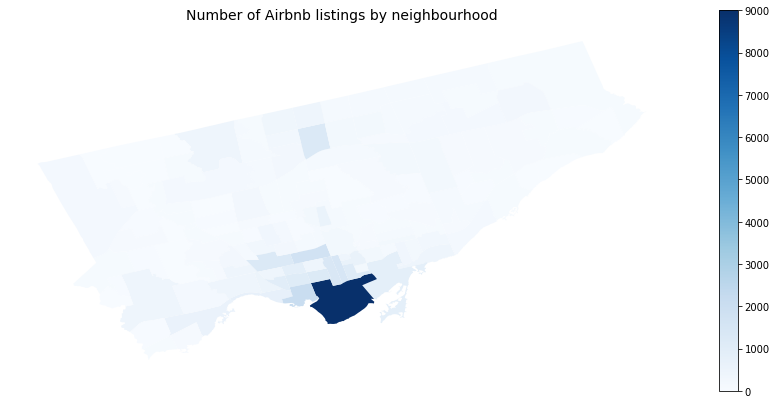

In [101]:
# Plotting the number of listings in each neighbourhood
fig1, ax1 = plt.subplots(figsize=(15, 7))
hood_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings by neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))  # scaling colour map
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

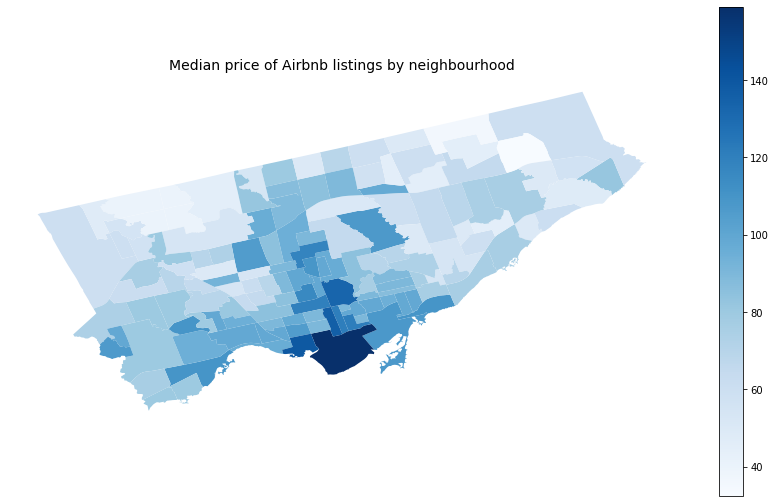

In [103]:
# Plotting the median price of listings in each hood
fig2, ax2 = plt.subplots(1, figsize=(15, 9))
hood_map_df.plot(column='median_price', cmap='Blues', ax=ax2)

ax2.axis('off')
ax2.set_title('Median price of Airbnb listings by neighbourhood', fontsize=24)

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(hood_map_df.median_price), vmax=max(hood_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)

plt.show()

In [108]:
# from: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# for plotting long/lat points
geometry = [Point(xy) for xy in zip( listing['longitude'], listing['latitude'])]

In [131]:
listings_by_hood = listing[['neighbourhood_cleansed', 'id', 'price']].set_index('neighbourhood_cleansed')
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(listings_by_hood, crs=crs, geometry=geometry)
geo_df

id   price  \
neighbourhood_cleansed                                
Little Portugal                        1419   469.0   
Waterfront Communities-The Island      8077    99.0   
Annex                                 12604    66.0   
Briar Hill-Belgravia                  23691    72.0   
Waterfront Communities-The Island     26654   199.0   
...                                     ...     ...   
Islington-City Centre West         40647107    60.0   
Moss Park                          40647659    69.0   
Kensington-Chinatown               40650244  2000.0   
Waterfront Communities-The Island  40650884   186.0   
York University Heights            40651493    30.0   

                                                     geometry  
neighbourhood_cleansed                                         
Little Portugal                    POINT (-79.42451 43.64617)  
Waterfront Communities-The Island  POINT (-79.37628 43.64105)  
Annex                              POINT (-79.41598 43.66724)  
Briar Hill-Belgravia               POINT (-79.45468 43.69602)  
Waterfront Communities-The Island  POINT (-79.38940 43.64530)  
...                                                       ...  
Islington-City Centre West         POINT (-79.51838 43.63222)  
Moss Park                          POINT (-79.35476 43.65715)  
Kensington-Chinatown               POINT (-79.39546 43.65354)  
Waterfront Communities-The Island  POINT (-79.39952 43.64179)  
York University Heights            POINT (-79.49577 43.76543)  

[23397 rows x 3 columns]

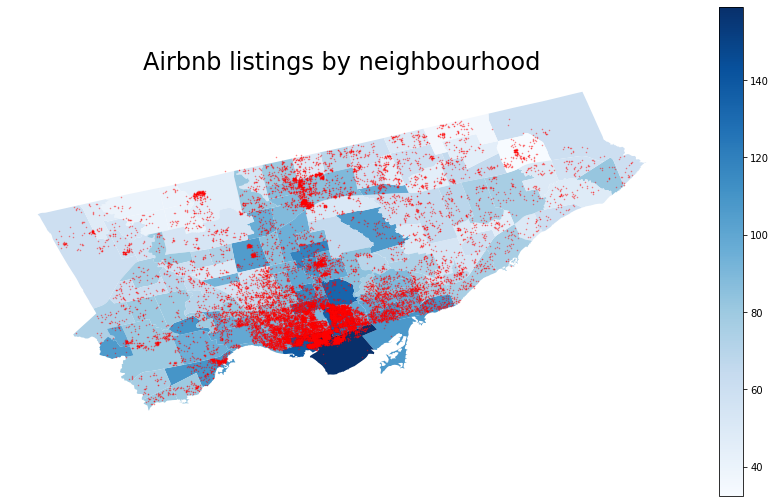

In [138]:
fig, ax = plt.subplots(figsize=(15, 9))
hood_map_df.plot(column='median_price', cmap='Blues', ax=ax)

ax.axis('off')
ax.set_title('Airbnb listings by neighbourhood', fontsize=24)

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(hood_map_df.median_price), vmax=max(hood_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig.colorbar(sm)

geo_df.plot(marker='.', markersize=1, c='red', alpha=0.5, ax=ax)
plt.show()

In [151]:
hood_map_df.loc[['Waterfront Communities-The Island']]

geometry  \
neighbourhood                                                                          
Waterfront Communities-The Island  MULTIPOLYGON (((-79.37697 43.64688, -79.37576 ...   

                                   number_of_listings  median_price  
neighbourhood                                                        
Waterfront Communities-The Island                4375         159.0

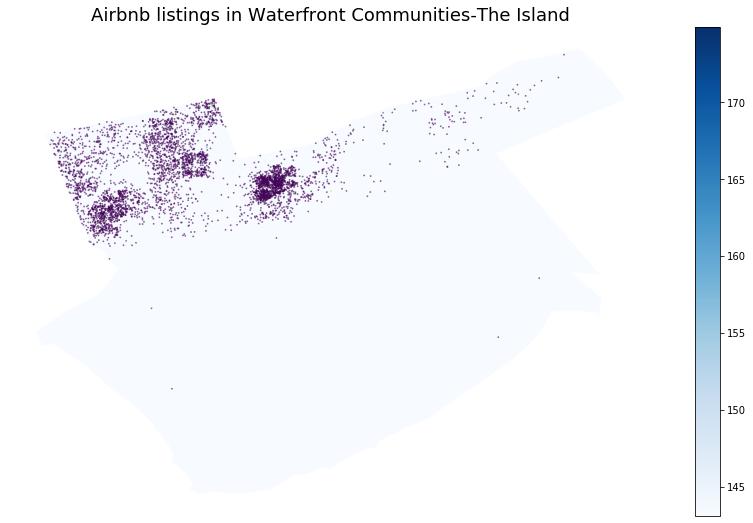

In [201]:
fig, ax = plt.subplots(figsize=(15, 9))
hood_map_df.loc[['Waterfront Communities-The Island']].plot(column='median_price', cmap='Blues', ax=ax)

ax.axis('off')
ax.set_title('Airbnb listings in Waterfront Communities-The Island', fontsize=18)

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(hood_map_df.loc[['Waterfront Communities-The Island']].median_price), vmax=max(hood_map_df.loc[['Waterfront Communities-The Island']].median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig.colorbar(sm)

geo_df.loc[['Waterfront Communities-The Island']].plot(marker='.', markersize=3, alpha=0.5, ax=ax)
plt.show()

In [163]:
temp_df = listing[listing['neighbourhood_cleansed'] == 'Waterfront Communities-The Island'][['neighbourhood_cleansed', 'latitude', 'longitude']]
temp_df

neighbourhood_cleansed   latitude  longitude
1      Waterfront Communities-The Island  43.641050 -79.376280
4      Waterfront Communities-The Island  43.645300 -79.389400
6      Waterfront Communities-The Island  43.641510 -79.376430
29     Waterfront Communities-The Island  43.641230 -79.393390
36     Waterfront Communities-The Island  43.645510 -79.392740
...                                  ...        ...        ...
23379  Waterfront Communities-The Island  43.649720 -79.388920
23381  Waterfront Communities-The Island  43.642260 -79.379550
23385  Waterfront Communities-The Island  43.643990 -79.364610
23386  Waterfront Communities-The Island  43.639497 -79.396401
23395  Waterfront Communities-The Island  43.641790 -79.399519

[4375 rows x 3 columns]

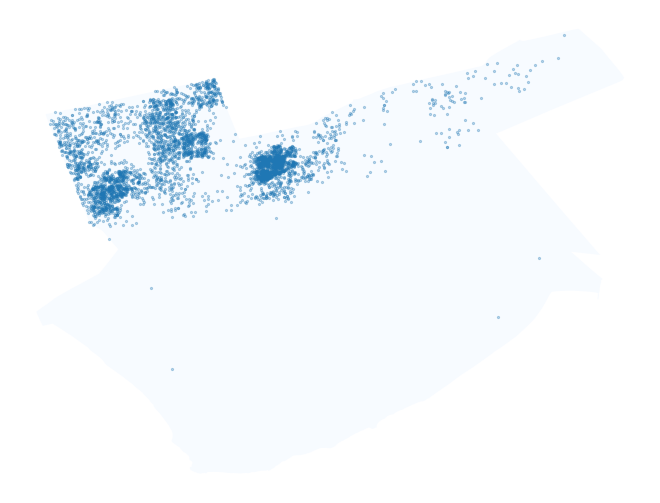

In [207]:
fig, ax = plt.subplots(figsize=(15, 9))
hood_map_df.loc[['Waterfront Communities-The Island']].plot(column='median_price', cmap='Blues', ax=ax)
ax.axis('off')
cm= plt.cm.get_cmap('hot')
temp_df.plot.scatter(x='longitude', y='latitude', marker='.', alpha=0.3, ax=ax);

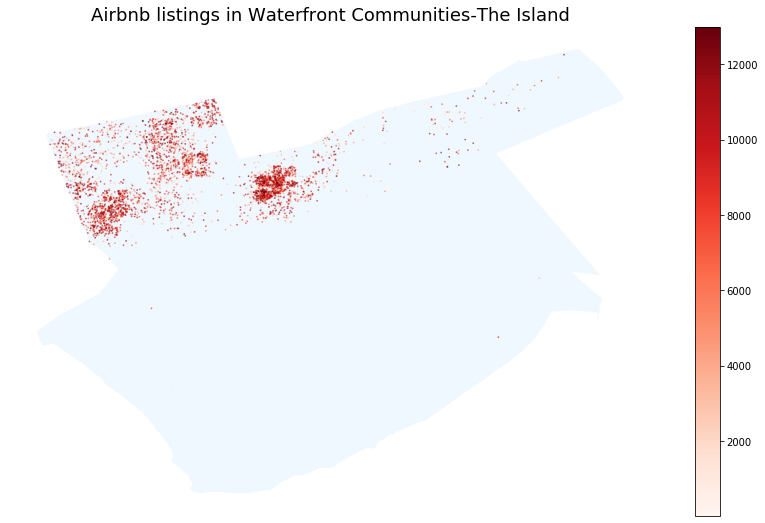

In [218]:
fig, ax = plt.subplots(figsize=(15, 9))
hood_map_df.loc[['Waterfront Communities-The Island']].plot(color='aliceblue', ax=ax)

ax.axis('off')
ax.set_title('Airbnb listings in Waterfront Communities-The Island', fontsize=18)

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(geo_df.loc[['Waterfront Communities-The Island']].price), vmax=max(geo_df.loc[['Waterfront Communities-The Island']].price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig.colorbar(sm)

geo_df.loc[['Waterfront Communities-The Island']].plot(marker='.', markersize=3, cmap='Reds', alpha=0.5, ax=ax)
plt.show()

In [237]:
listing[listing['neighbourhood_cleansed'] == 'Waterfront Communities-The Island'][['name', 'neighbourhood_cleansed', 'price', 'is_location_exact', 'zipcode']].sort_values(by='price')

name  \
9539   Luxurious | Modern | 1BR +Den | Downtown | Bal...   
9674   Spacious Loft in Toronto's Entertainment District   
14046  CUTE AND QUIET, SMALL TRAVELER ROOM. MAX 1 PER...   
9570   2. UNIQUE DOWNTOWN GUEST HOUSE SUITABLE 4 TRAV...   
9123    Downtown Toronto. Good for quick one-night stay.   
...                                                  ...   
21985  The Rex Hotel, Basic 1 Double Bed Shared Bathroom   
21984           The Rex Hotel, Basic Single 1 Single Bed   
21980         The Rex Hotel, Large Standard 1 Double Bed   
7819           Luxury Suite in Heart of Downtown Toronto   
8225            Modern Upscale Condo in downtown Toronto   

                  neighbourhood_cleansed    price  is_location_exact  zipcode  
9539   Waterfront Communities-The Island     13.0                  0  M5V 0H5  
9674   Waterfront Communities-The Island     13.0                  1  M5V 2L2  
14046  Waterfront Communities-The Island     19.0                  1  M5A 4G7  
9570   Waterfront Communities-The Island     29.0                  1  M5A 4G7  
9123   Waterfront Communities-The Island     30.0                  0  M5V 2G3  
...                                  ...      ...                ...      ...  
21985  Waterfront Communities-The Island  10001.0                  1  M5V 1Z1  
21984  Waterfront Communities-The Island  10001.0                  1  M5V 1Z1  
21980  Waterfront Communities-The Island  10001.0                  1  M5V 1Z1  
7819   Waterfront Communities-The Island  12001.0                  0  M5E 1R4  
8225   Waterfront Communities-The Island  13000.0                  1  M5V 1P6  

[4375 rows x 5 columns]

In [235]:
listing.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availabilty_days',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_comm

### Folium test

In [266]:
# Example data from Folium quick start page
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

In [299]:
print(state_data.shape)
state_data.head()  # so need to create an equivalent df with 'hood and price

(50, 2)


State  Unemployment
0    AL           7.1
1    AK           6.8
2    AZ           8.1
3    AR           7.2
4    CA          10.1

In [300]:
f = pd.read_json(state_geo)
print(f.shape)
f.head()

(50, 2)


type                                           features
0  FeatureCollection  {'type': 'Feature', 'id': 'AL', 'properties': ...
1  FeatureCollection  {'type': 'Feature', 'id': 'AK', 'properties': ...
2  FeatureCollection  {'type': 'Feature', 'id': 'AZ', 'properties': ...
3  FeatureCollection  {'type': 'Feature', 'id': 'AR', 'properties': ...
4  FeatureCollection  {'type': 'Feature', 'id': 'CA', 'properties': ...

In [263]:
f.features[0]

{'type': 'Feature',
 'id': 'AL',
 'properties': {'name': 'Alabama'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.60028199999999, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.0986

In [302]:
# Airbnb provided geojson file
bnb_json = pd.read_json('data/neighbourhoods.geojson')
bnb_json.head()

type                                           features
0  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
1  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
2  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
3  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
4  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...

In [303]:
bnb_json.features[0]  # so it is missing 'id' and 'properties' keys vs. Folium...

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-79.505288, 43.759873],
     [-79.504883, 43.759964],
     [-79.504904, 43.760108],
     [-79.504933, 43.760207],
     [-79.504951, 43.76027],
     [-79.504937, 43.760414],
     [-79.504975, 43.760556],
     [-79.50516, 43.760616],
     [-79.505351, 43.760602],
     [-79.505537, 43.760663],
     [-79.505717, 43.760605],
     [-79.505917, 43.760552],
     [-79.506056, 43.760623],
     [-79.505903, 43.760693],
     [-79.505998, 43.7608],
     [-79.506215, 43.760843],
     [-79.506345, 43.760757],
     [-79.506533, 43.760728],
     [-79.506703, 43.760661999999996],
     [-79.506845, 43.760745],
     [-79.507002, 43.760846],
     [-79.507203, 43.760791],
     [-79.507396, 43.76081],
     [-79.507447, 43.760961],
     [-79.507424, 43.761131],
     [-79.507443, 43.761313],
     [-79.507601, 43.76145],
     [-79.50778, 43.76158],
     [-79.508013, 43.761644],
     [-79.508175, 43.761677],
     [-79.508232, 43.76178

In [309]:
# SET UP DATA/JSON
# equiv data file as state_data
hood_data = listing.groupby('neighbourhood_cleansed')['price'].mean().to_frame().reset_index()
hood_data.columns = ['Hood', 'Price']
hood_data.tail()

Hood       Price
135                 Wychwood  109.727273
136           Yonge-Eglinton  163.633333
137           Yonge-St.Clair  157.678161
138  York University Heights   64.550239
139       Yorkdale-Glen Park  118.190141

In [374]:
# Add missing json elements to match sample
for i, name in enumerate(hood_data.Hood):
    geobnb[i]['id'] = i
    geobnb[i]['properties'] = {'name': name}
print(geobnb[139]['properties']['name'])

# and assemble into proper data structure as dict:
#    {'type': 'FeatureCollection', 'features': [ loop through to insert each dict from above ]}
geo_dict = {'type': 'FeatureCollection', 'features': [i for i in geobnb]}
geo_dict

Yorkdale-Glen Park


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-79.505288, 43.759873],
       [-79.504883, 43.759964],
       [-79.504904, 43.760108],
       [-79.504933, 43.760207],
       [-79.504951, 43.76027],
       [-79.504937, 43.760414],
       [-79.504975, 43.760556],
       [-79.50516, 43.760616],
       [-79.505351, 43.760602],
       [-79.505537, 43.760663],
       [-79.505717, 43.760605],
       [-79.505917, 43.760552],
       [-79.506056, 43.760623],
       [-79.505903, 43.760693],
       [-79.505998, 43.7608],
       [-79.506215, 43.760843],
       [-79.506345, 43.760757],
       [-79.506533, 43.760728],
       [-79.506703, 43.760661999999996],
       [-79.506845, 43.760745],
       [-79.507002, 43.760846],
       [-79.507203, 43.760791],
       [-79.507396, 43.76081],
       [-79.507447, 43.760961],
       [-79.507424, 43.761131],
       [-79.507443, 43.761313],
       [-79.507601, 43.76145],
       [-79.50

In [322]:
import folium

# Base map
m = folium.Map(location=[43.67, -79.35], zoom_start=12) #, tiles='Stamen Terrain')

# Add a marker
folium.Marker(
    location=[43.67, -79.35],
    popup='Welcome to <b>TORONTO</b>',
    tooltip = "Click for more"
).add_to(m)

m

In [375]:
# Neighbourhoods layer
folium.Choropleth(
    geo_data=geo_dict,
    name='choropleth',
    data=hood_data,
    columns=['Hood', 'Price'],
    key_on='feature.properties.name',  
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Prices'
).add_to(m)

m